In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#carga desde un archivo .csv sin indice 
data = pd.read_excel('Detalle precios y productos fabricados 2022.xlsx')
data.head(5)

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CANT,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,1,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,1,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,7,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,1,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,2,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,172.41,101.71,101.71,344.83,203.42,70.71,141.41


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CVE_DOC                    1426 non-null   object        
 1   FECHA_DOC                  1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR            1424 non-null   object        
 3   NOMBRE_CLIENTE             1426 non-null   object        
 4   CANT                       1426 non-null   int64         
 5   CVE_ART                    1426 non-null   object        
 6   DESCR                      1426 non-null   object        
 7   PRECIO_UNITARIO            1426 non-null   float64       
 8   COSTO_UNITARIO             1426 non-null   float64       
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64       
 10  SUBTOTAL_PARTIDA           1426 non-null   float64       
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64       
 12  MARGEN

In [4]:
Valores_Nulos = data.isnull().sum()
Valores_Nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              2
NOMBRE_CLIENTE               0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [11]:
# Separar columnas cuantitativas y cualitativas
cuantitativas = data.iloc[ : , [4,7,8,9,10,11,12,13]]
cualitativas = data.iloc[ : , [0,1,2,3,5,6]]

In [30]:
#Identificar valores nulos por dataframe
valores_nulos = data.isnull().sum()
valores_nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              2
NOMBRE_CLIENTE               0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x800 with 0 Axes>

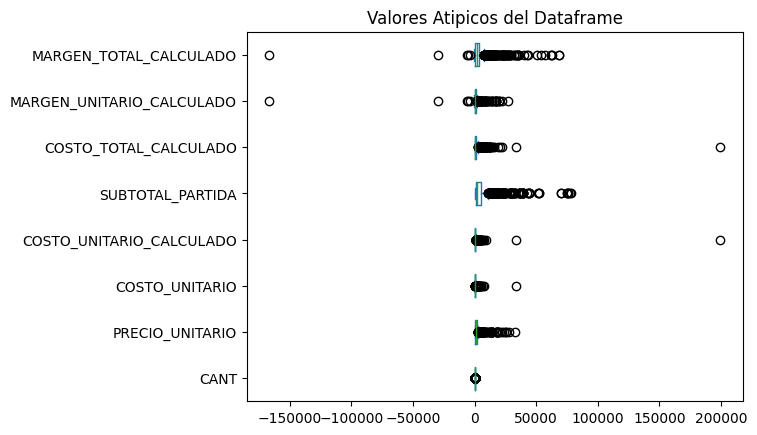

In [13]:
fig = plt.figure (figsize = (15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

In [14]:
#Métodos aplicando desviacion estandar, Encuentro los valores extremos
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior =  y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido CANT                            22.531793
PRECIO_UNITARIO               9533.970813
COSTO_UNITARIO                3313.473534
COSTO_UNITARIO_CALCULADO     16686.790475
SUBTOTAL_PARTIDA             31402.663810
COSTO_TOTAL_CALCULADO        18629.377526
MARGEN_UNITARIO_CALCULADO    16001.398440
MARGEN_TOTAL_CALCULADO       28691.369713
dtype: float64
Limite inferior permitido CANT                           -14.324219
PRECIO_UNITARIO              -6499.204684
COSTO_UNITARIO               -2821.614250
COSTO_UNITARIO_CALCULADO    -15603.765678
SUBTOTAL_PARTIDA            -21404.897036
COSTO_TOTAL_CALCULADO       -15803.336348
MARGEN_UNITARIO_CALCULADO   -14049.656995
MARGEN_TOTAL_CALCULADO      -21519.643893
dtype: float64


In [15]:
#Obtenemos datos y los outliers se convierten en nulos
data2 = cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [16]:
#Identificar valores atipicos
valores_nulos = data2.isnull().sum()
valores_nulos

CANT                         28
PRECIO_UNITARIO              29
COSTO_UNITARIO               10
COSTO_UNITARIO_CALCULADO      2
SUBTOTAL_PARTIDA             36
COSTO_TOTAL_CALCULADO         5
MARGEN_UNITARIO_CALCULADO    13
MARGEN_TOTAL_CALCULADO       24
dtype: int64

In [17]:
data_clean = data2.copy()
data_clean = data_clean.fillna(round(data2.mean(),1))
data_clean

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [18]:
#Identificar valores atipicos
valores_nulos = data_clean.isnull().sum()
valores_nulos

CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x800 with 0 Axes>

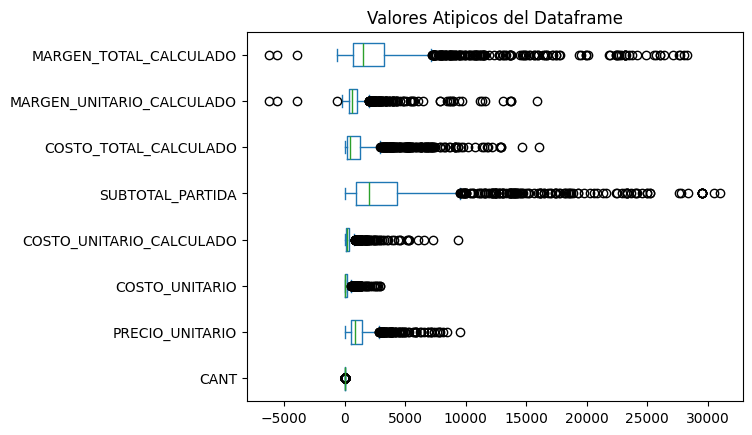

In [19]:
fig = plt.figure (figsize = (15, 8))
data_clean.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

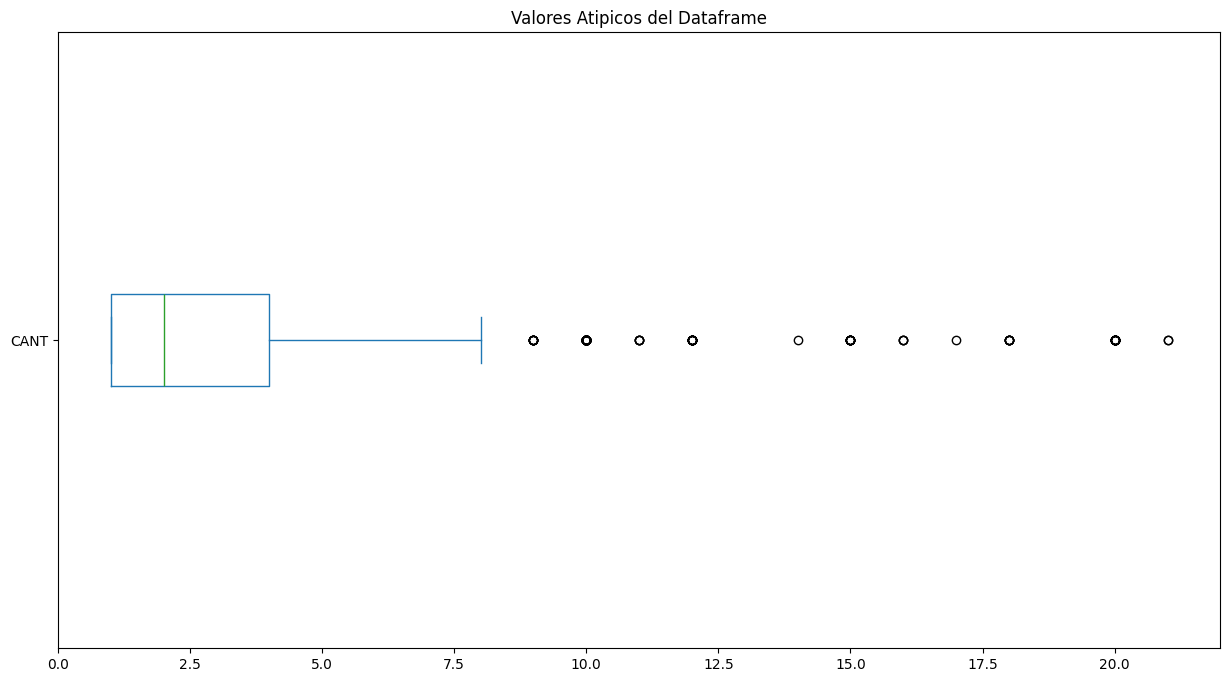

In [41]:
fig_1 = plt.figure (figsize = (15, 8))
data_clean['CANT'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

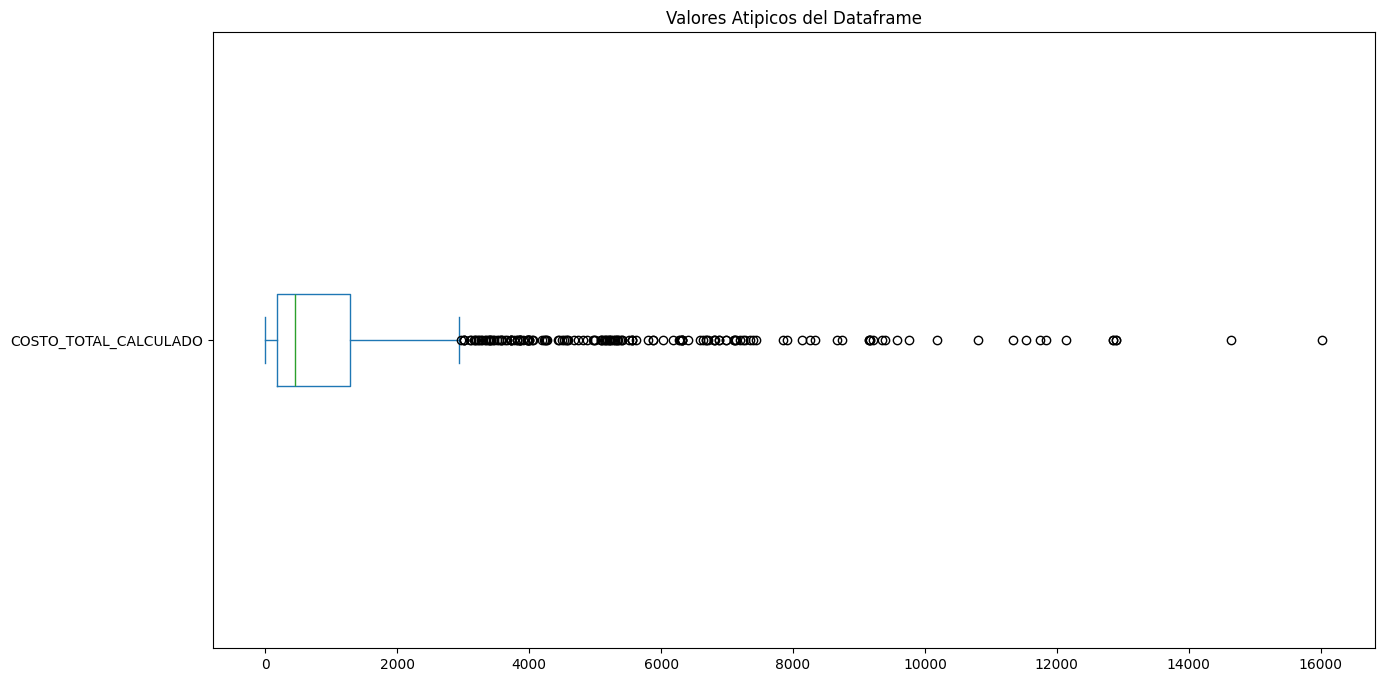

In [42]:
fig_2 = plt.figure (figsize = (15, 8))
data_clean['COSTO_TOTAL_CALCULADO'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

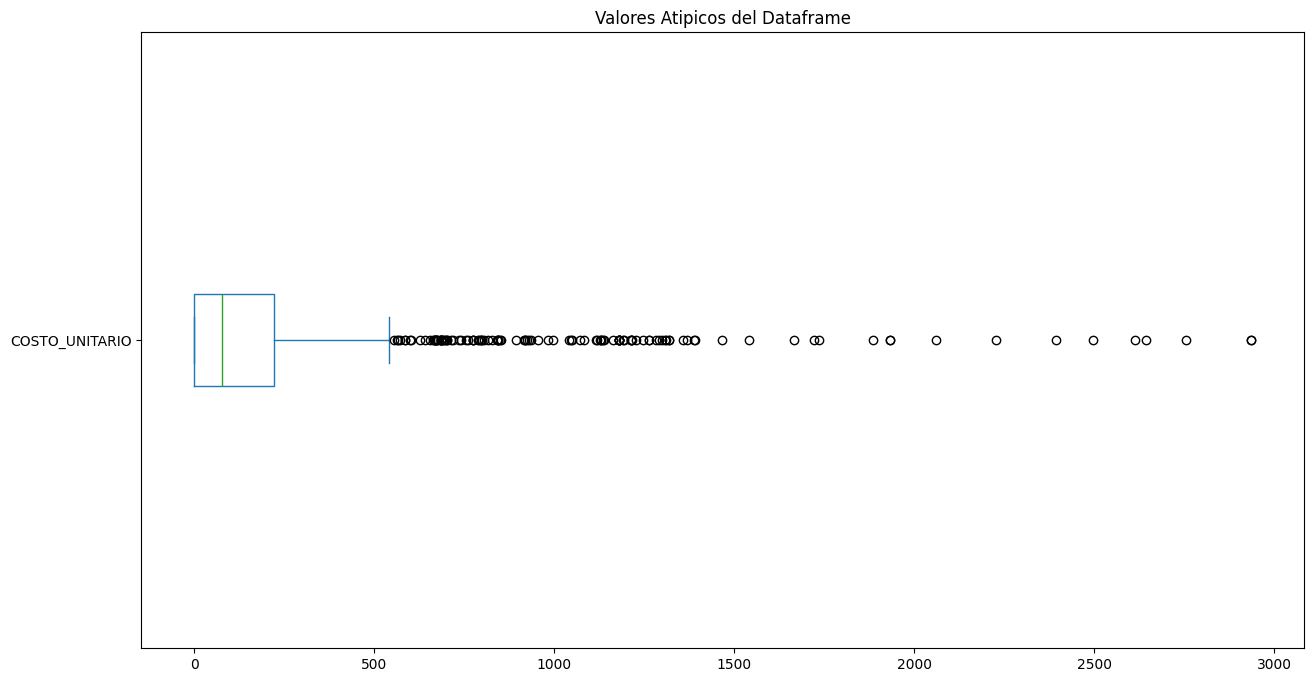

In [43]:
fig_3 = plt.figure (figsize = (15, 8))
data_clean['COSTO_UNITARIO'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

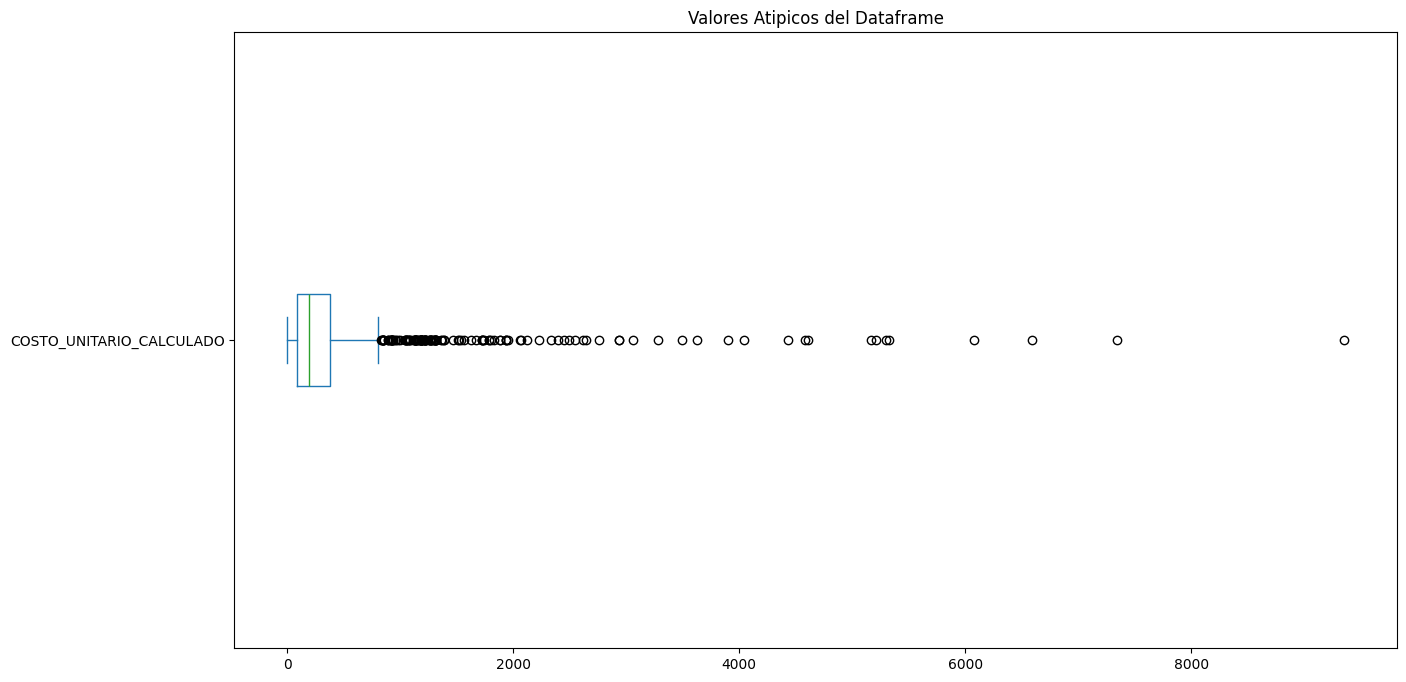

In [44]:
fig_4 = plt.figure (figsize = (15, 8))
data_clean['COSTO_UNITARIO_CALCULADO'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

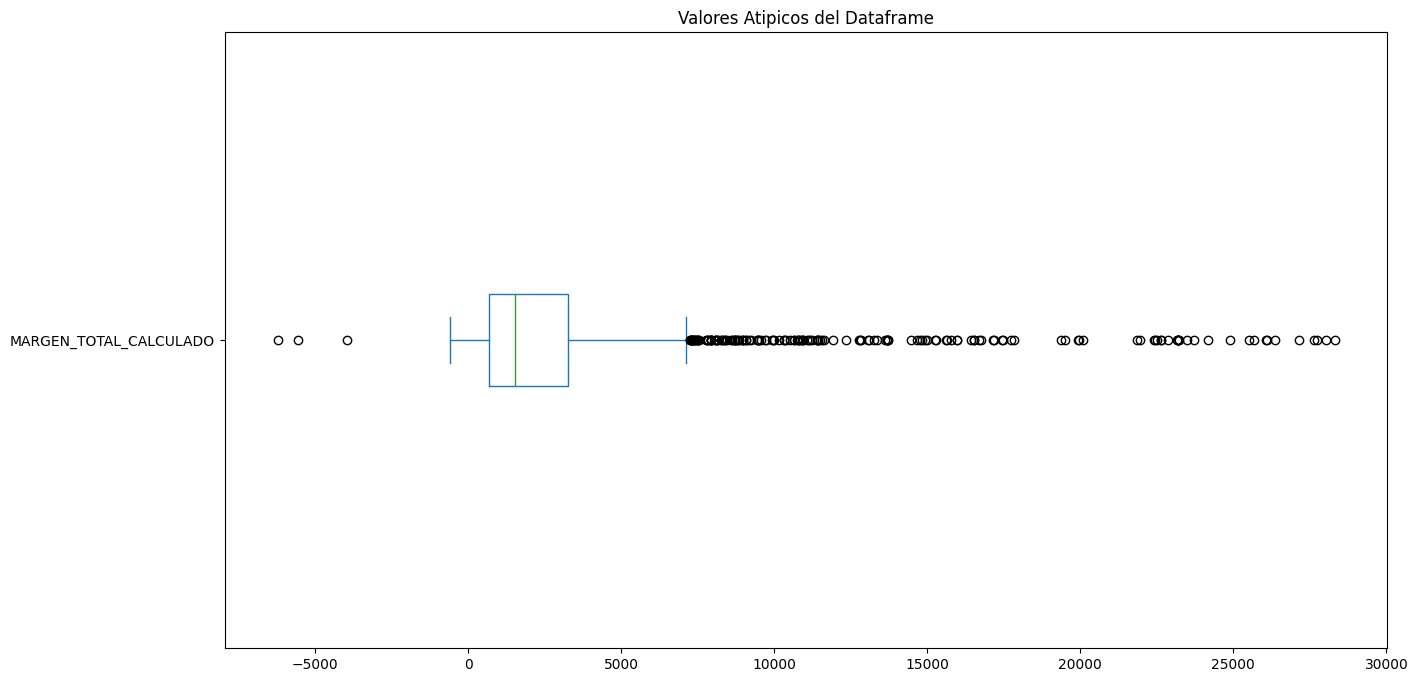

In [45]:
fig_5 = plt.figure (figsize = (15, 8))
data_clean['MARGEN_TOTAL_CALCULADO'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

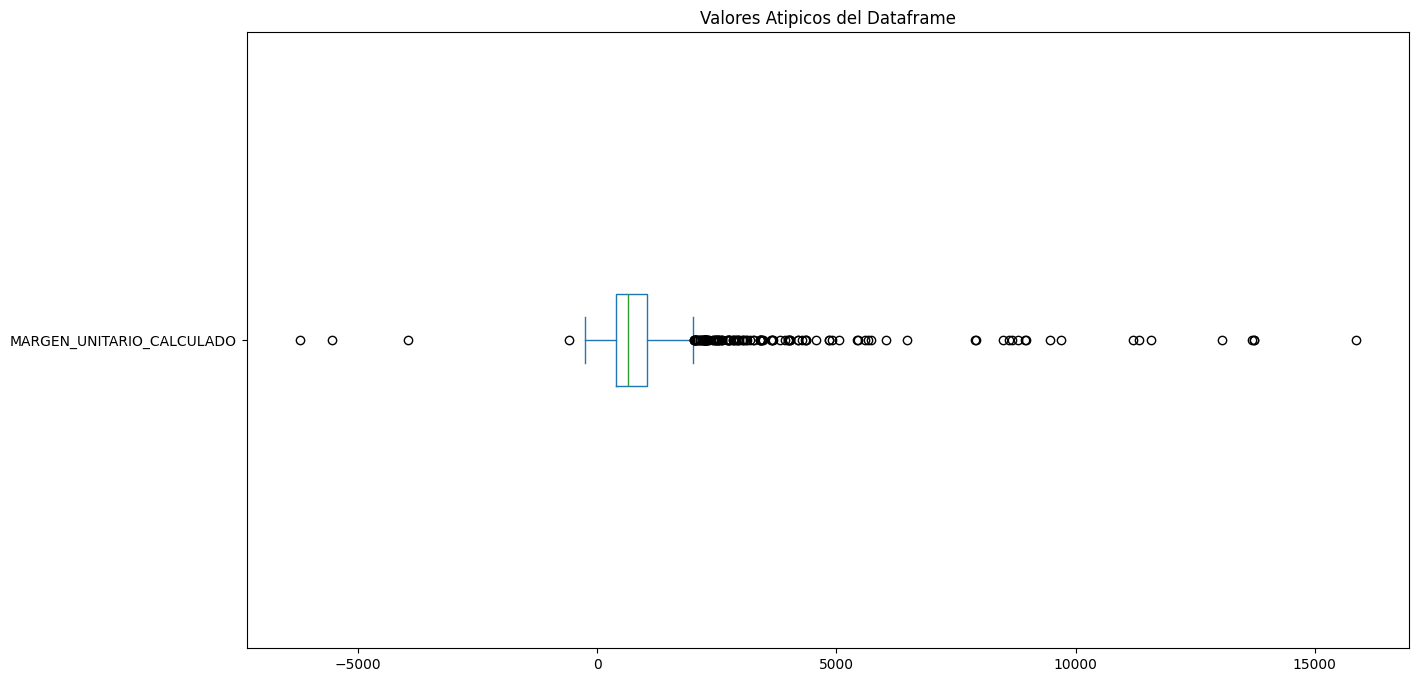

In [46]:
fig_6 = plt.figure (figsize = (15, 8))
data_clean['MARGEN_UNITARIO_CALCULADO'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

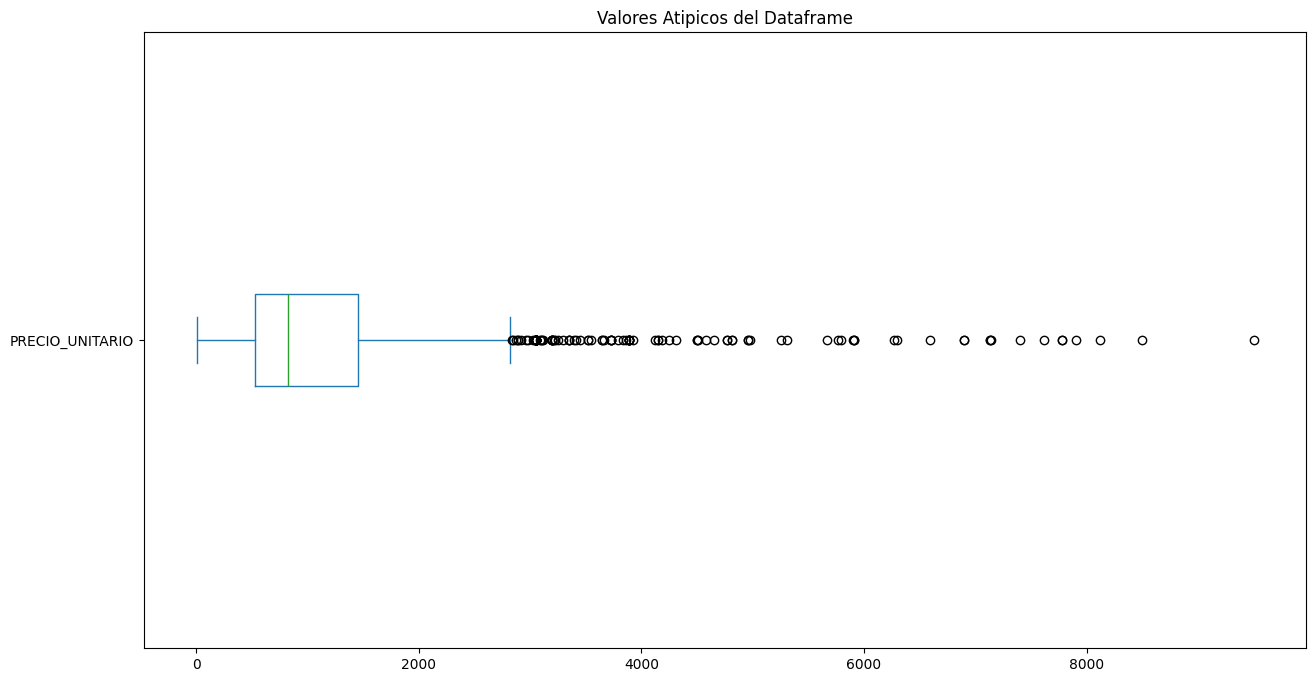

In [47]:
fig_7 = plt.figure (figsize = (15, 8))
data_clean['PRECIO_UNITARIO'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

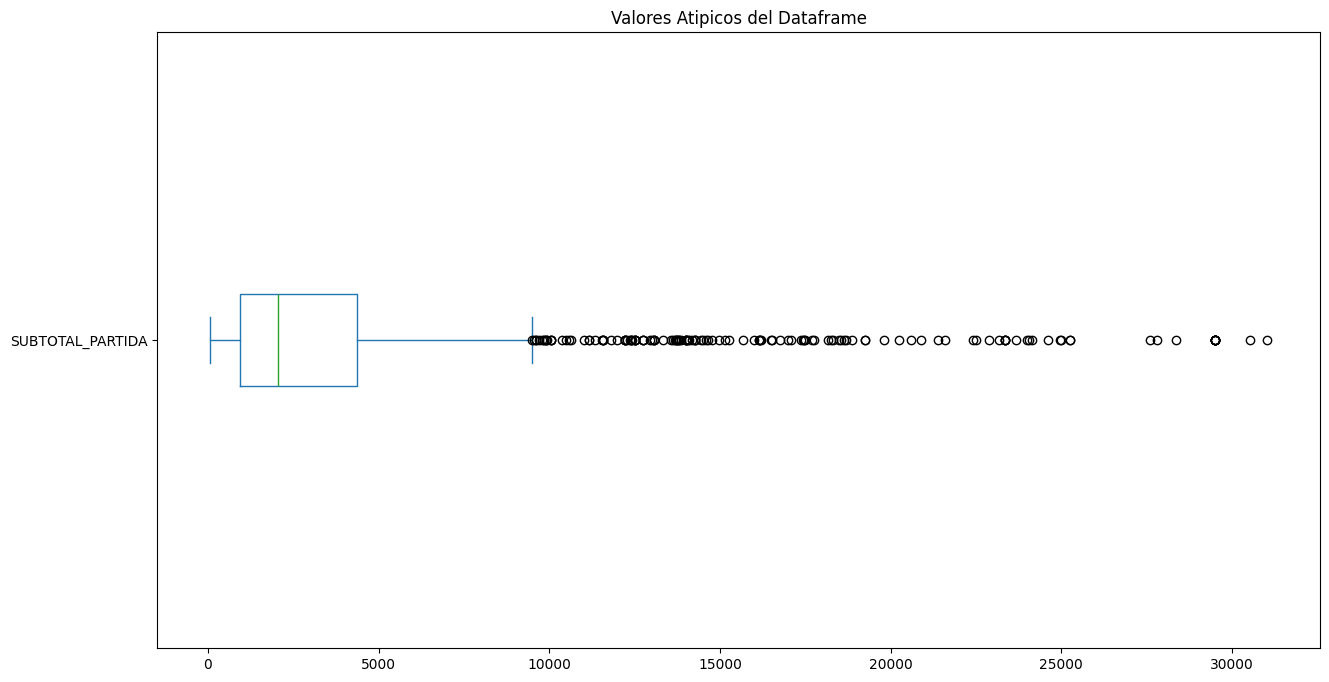

In [48]:
fig_8 = plt.figure (figsize = (15, 8))
data_clean['SUBTOTAL_PARTIDA'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

**PROCESAMIENTO ""DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [20]:
y = cuantitativas
percentiles25 = y.quantile(0.25) # Q1
percentiles75 = y.quantile(0.75) # Q3
iqr = percentiles75 - percentiles25

Limite_Superior_iqr = percentiles75 + 1.5*iqr
Limite_Inferior_iqr = percentiles25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido CANT                             8.50000
PRECIO_UNITARIO               2954.86625
COSTO_UNITARIO                 567.95000
COSTO_UNITARIO_CALCULADO       807.81375
SUBTOTAL_PARTIDA             10783.51250
COSTO_TOTAL_CALCULADO         2971.36250
MARGEN_UNITARIO_CALCULADO     2089.94625
MARGEN_TOTAL_CALCULADO        7807.59750
dtype: float64
Limite inferior permitido CANT                           -3.50000
PRECIO_UNITARIO              -927.40375
COSTO_UNITARIO               -340.77000
COSTO_UNITARIO_CALCULADO     -340.87625
SUBTOTAL_PARTIDA            -4946.78750
COSTO_TOTAL_CALCULADO       -1506.25750
MARGEN_UNITARIO_CALCULADO    -621.22375
MARGEN_TOTAL_CALCULADO      -3594.42250
dtype: float64


In [21]:
#Obtenemos datos limpios del Dataframe
data2_iqr = cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,NaN,NaN,NaN,5909.84,1884.35,NaN,4025.49


In [22]:
#Identificar valores nulos del dataframe LIMPIO
valores_nulos = data2_iqr.isnull().sum()
valores_nulos

CANT                         169
PRECIO_UNITARIO              127
COSTO_UNITARIO               128
COSTO_UNITARIO_CALCULADO     144
SUBTOTAL_PARTIDA             159
COSTO_TOTAL_CALCULADO        162
MARGEN_UNITARIO_CALCULADO    132
MARGEN_TOTAL_CALCULADO       168
dtype: int64

In [23]:
#Reemplazamos valores atipicops (nulos) del dataframe con "mean"

data3_iqr = data2_iqr.copy()
data3_iqr = data3_iqr.fillna(round(data2.mean(),1))
data3_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,1188.00,191.80,378.80,5909.84,1884.35,974.40,4025.49


In [49]:
#Identificar valores nulos del dataframe LIMPIO
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [50]:
Datos_limpios = pd.concat([cualitativas, data3_iqr ] , axis=1)
Datos_limpios

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CVE_ART,DESCR,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM",6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM",6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,F39835,2022-12-23,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP",3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,F39837,2022-12-23,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT",1.0,1188.00,191.80,378.80,5909.84,1884.35,974.40,4025.49


In [51]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("Datos_Limpios.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x800 with 0 Axes>

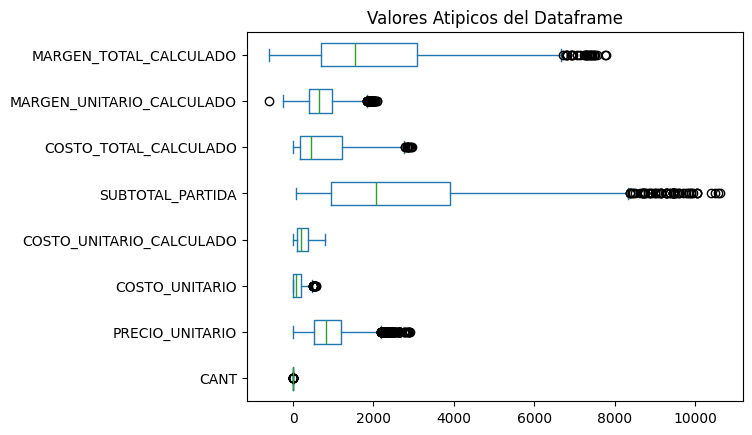

In [26]:
fig = plt.figure (figsize = (15, 8))
data3_iqr.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

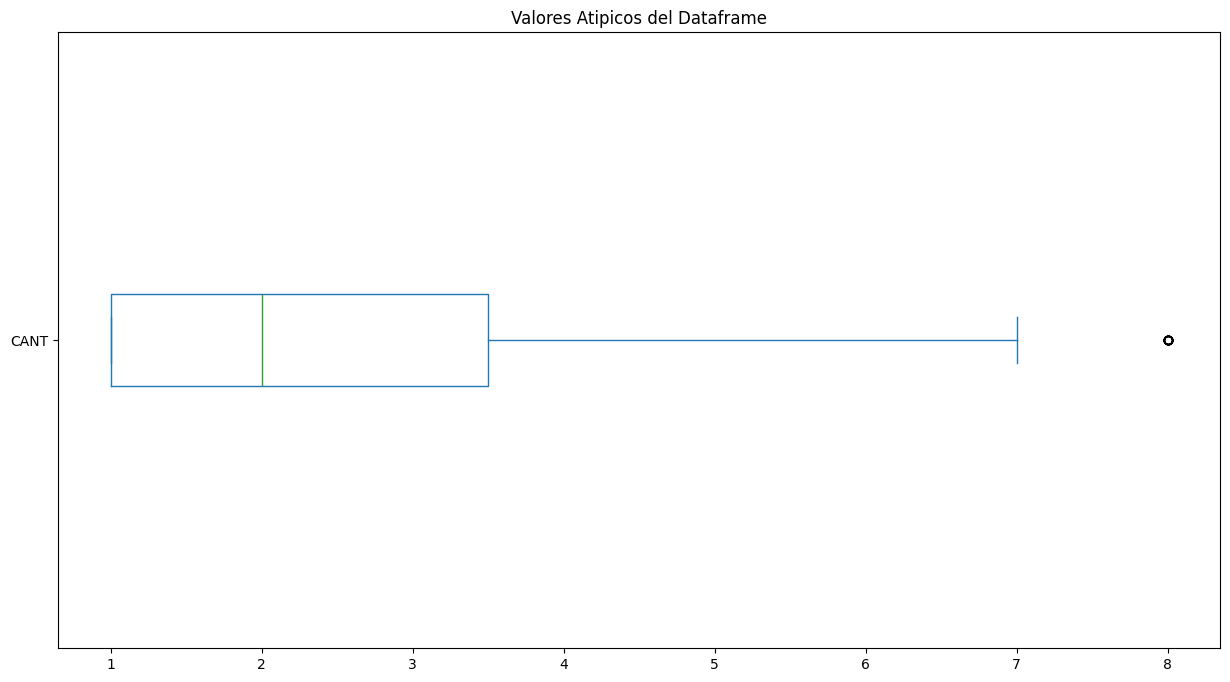

In [27]:
fig1 = plt.figure (figsize = (15, 8))
data3_iqr['CANT'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

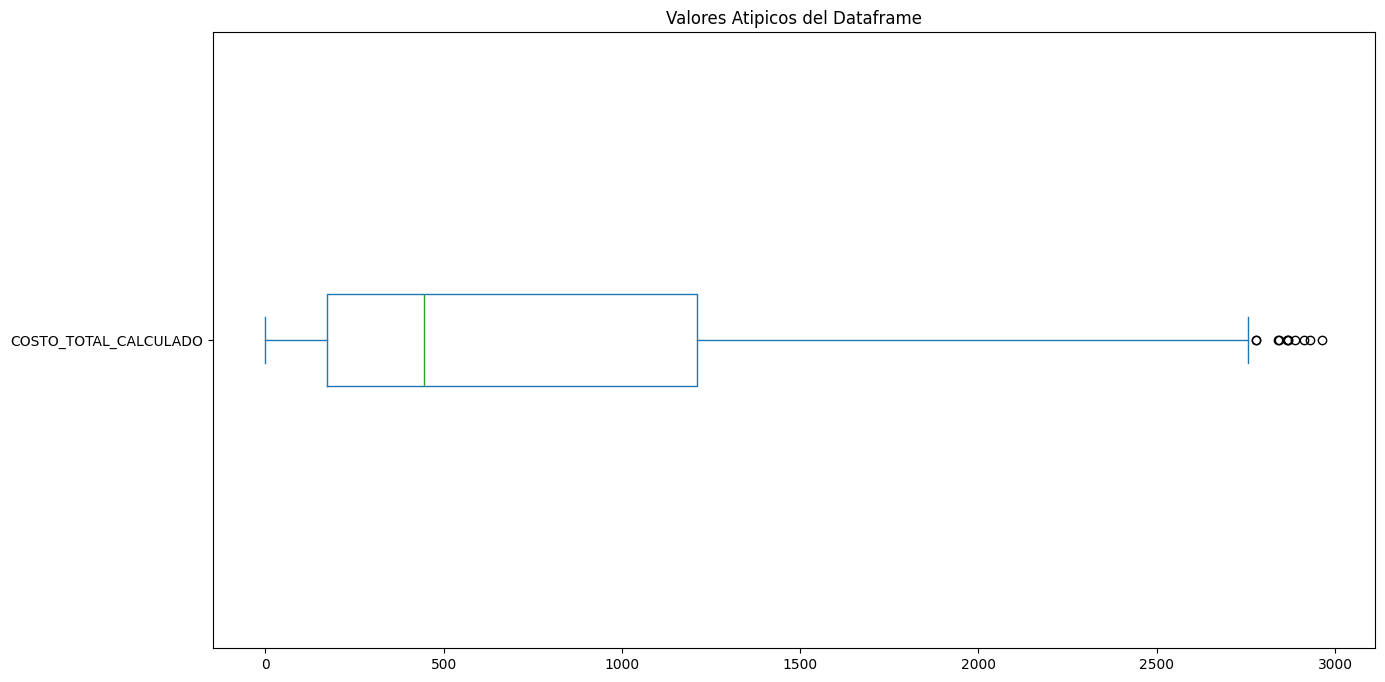

In [31]:
fig2 = plt.figure (figsize = (15, 8))
data3_iqr['COSTO_TOTAL_CALCULADO'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

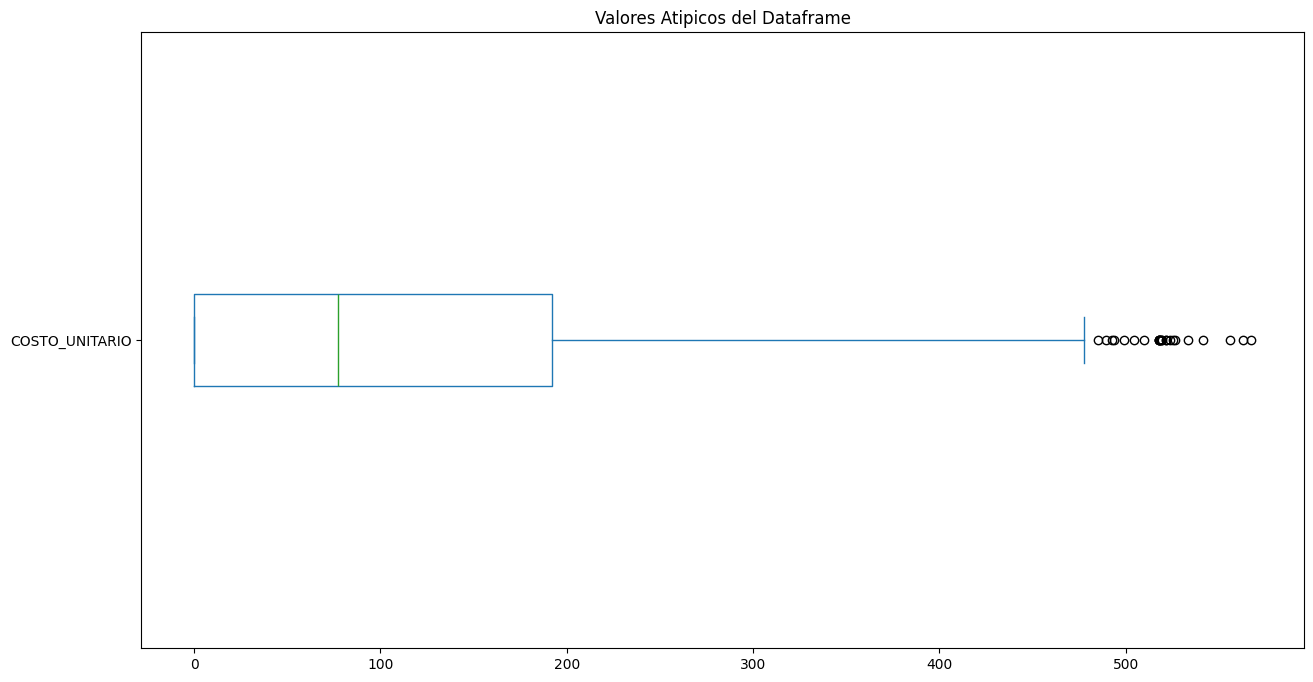

In [32]:
fig3 = plt.figure (figsize = (15, 8))
data3_iqr['COSTO_UNITARIO'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

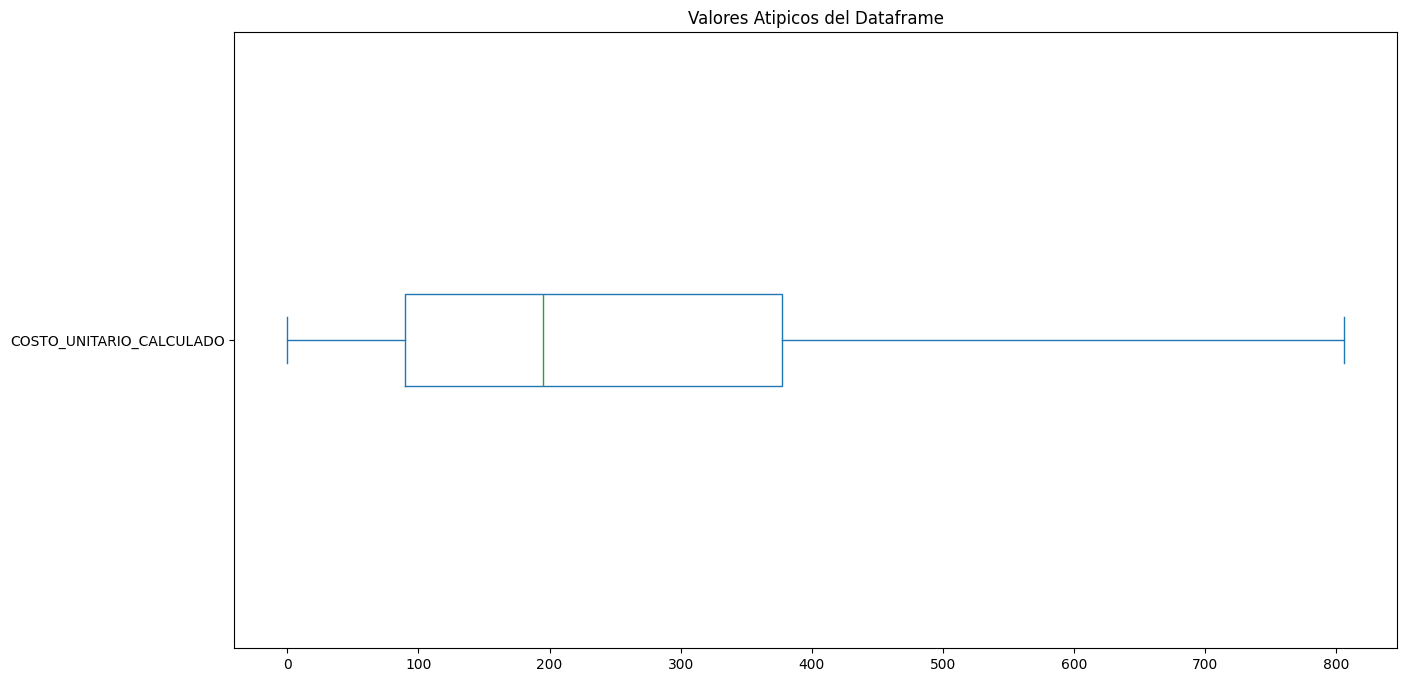

In [ ]:
fig4 = plt.figure (figsize = (15, 8))
data3_iqr['COSTO_UNITARIO_CALCULADO'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

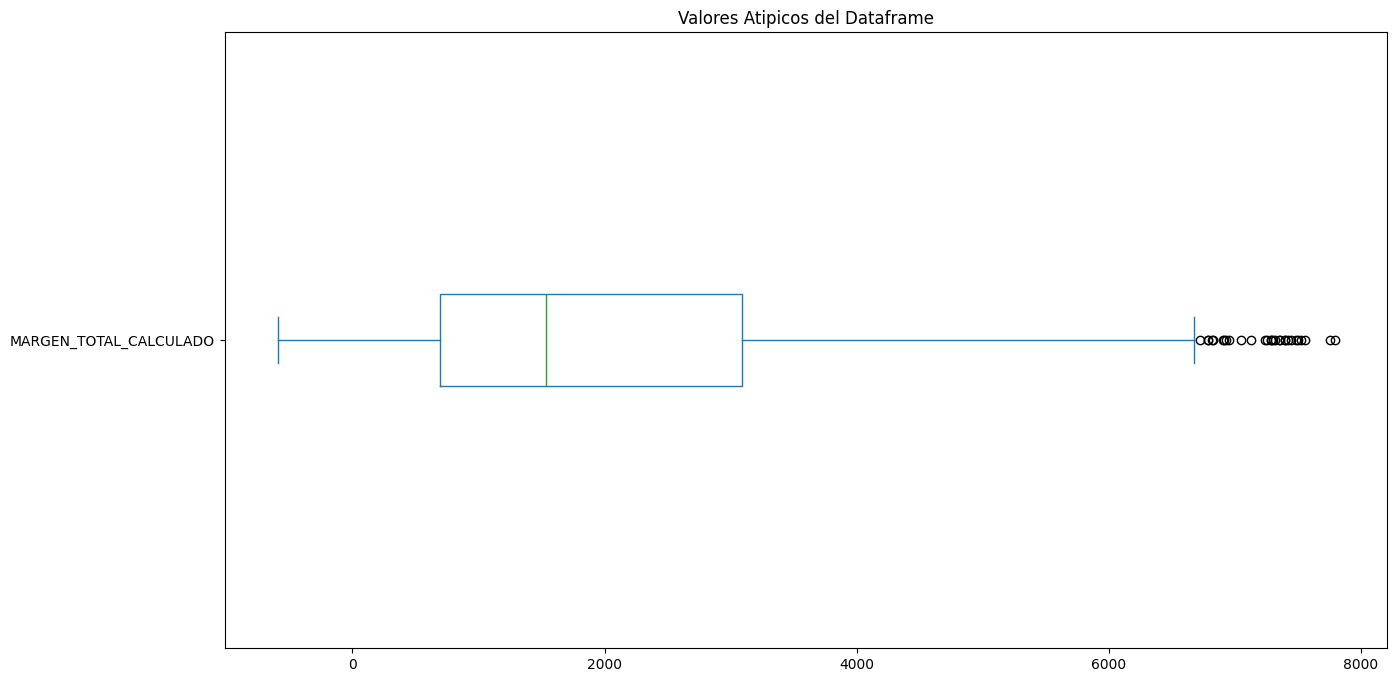

In [35]:
fig5 = plt.figure (figsize = (15, 8))
data3_iqr['MARGEN_TOTAL_CALCULADO'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

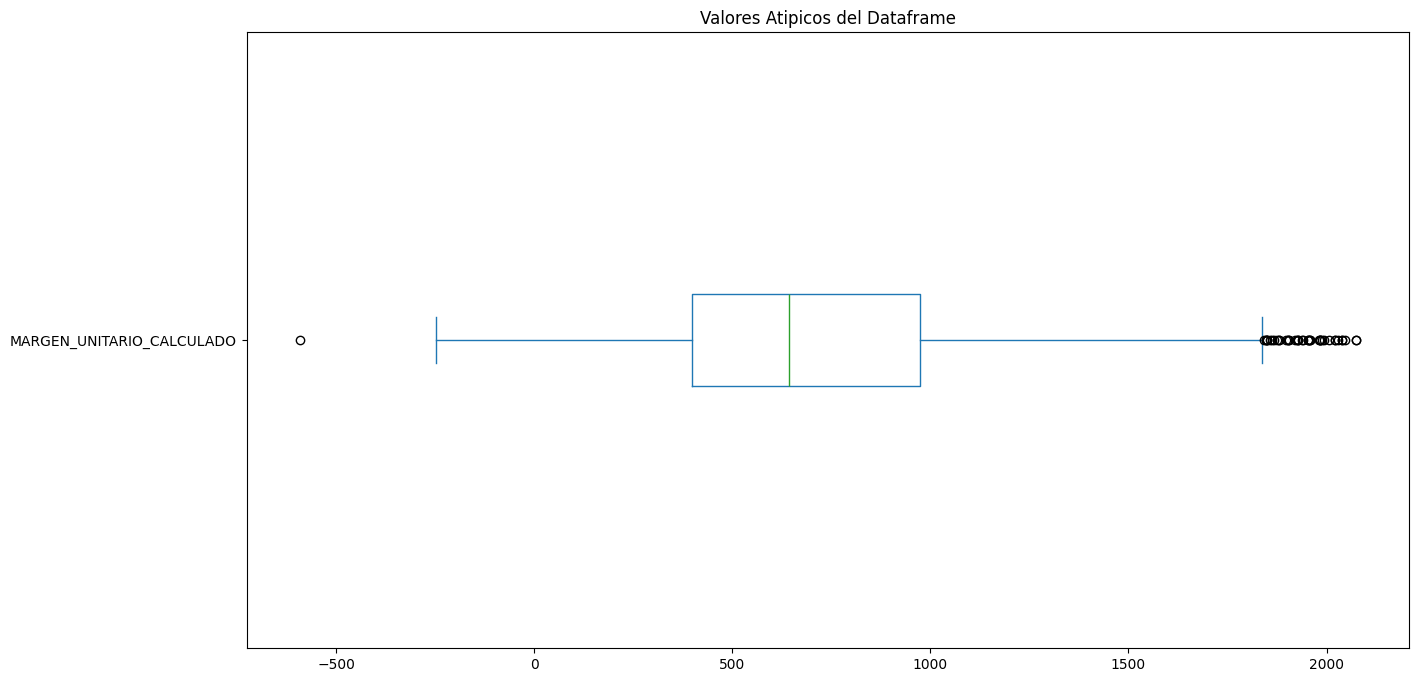

In [36]:
fig6 = plt.figure (figsize = (15, 8))
data3_iqr['MARGEN_UNITARIO_CALCULADO'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

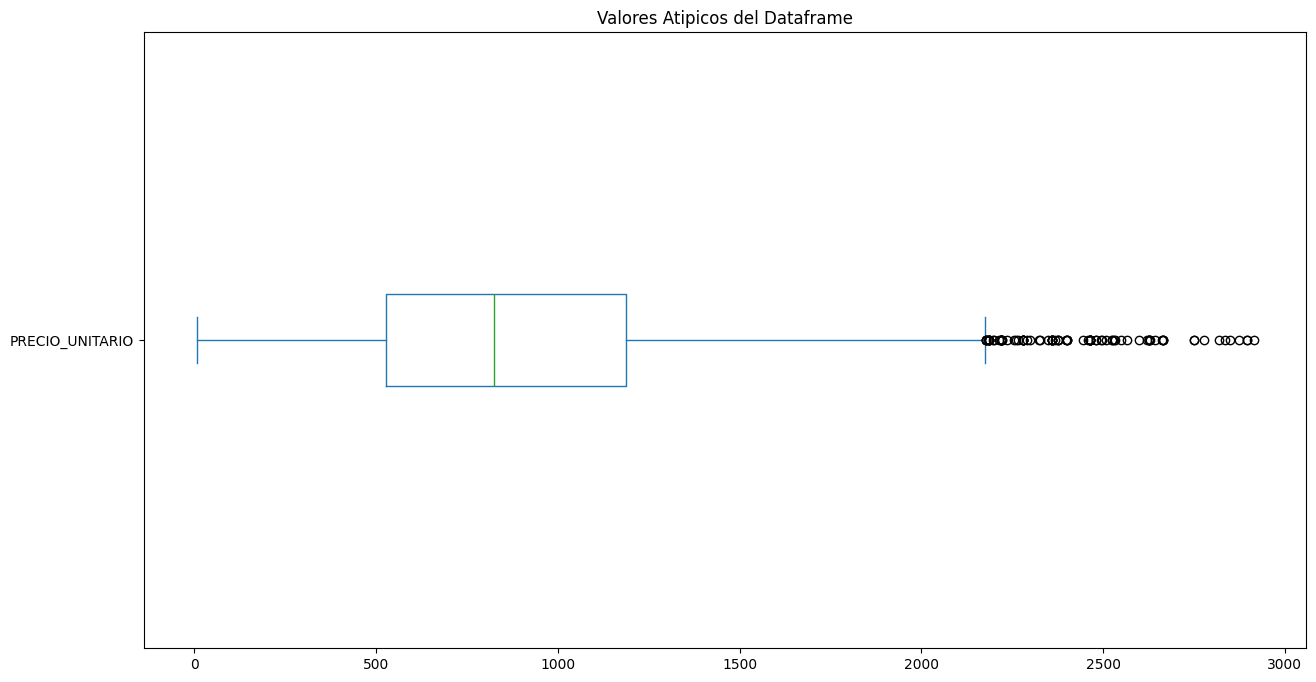

In [39]:
fig7 = plt.figure (figsize = (15, 8))
data3_iqr['PRECIO_UNITARIO'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

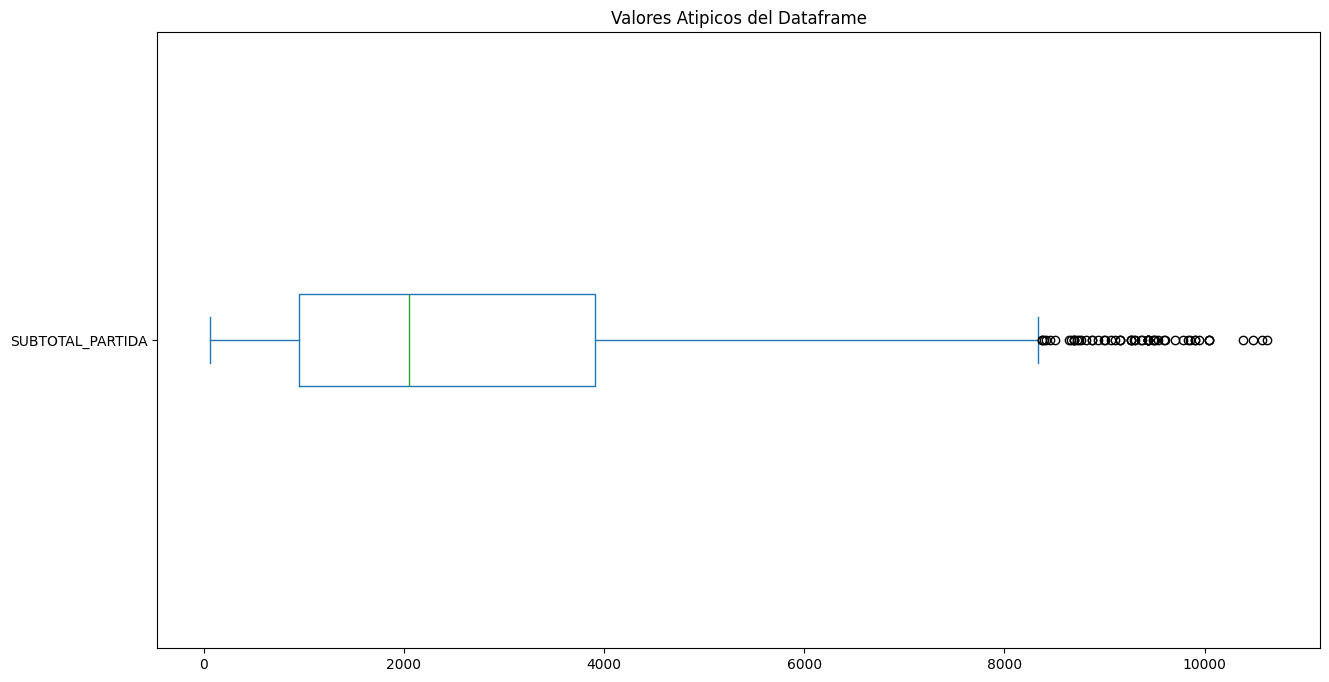

In [40]:
fig8 = plt.figure (figsize = (15, 8))
data3_iqr['SUBTOTAL_PARTIDA'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show